In [40]:
import pandas as pd
import re
import nltk
import gensim
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

nltk.download('punkt')

df = pd.read_csv("email_dataset.csv", quotechar='"')

def clean_text(text):
    if isinstance(text, float): 
        return ""
    text = text.lower() 
    text = re.sub(r'\W', ' ', text)  
    text = re.sub(r'\s+', ' ', text).strip()  
    return text

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anand\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [41]:
df['cleaned_message'] = df['message'].astype(str).apply(clean_text)

df['tokens'] = df['cleaned_message'].apply(word_tokenize)

corpus = df['tokens'].tolist()

In [42]:
word2vec_model = Word2Vec(sentences=corpus, vector_size=100, window=5, min_count=1, workers=4)

In [43]:
word_vectors = word2vec_model.wv

vocab = list(word_vectors.key_to_index.keys())

word_embeddings = [word_vectors[word] for word in vocab]

Principal Component Analysis (PCA) is a dimensionality reduction technique used in Machine Learning and Data Science to simplify large datasets while preserving essential information.

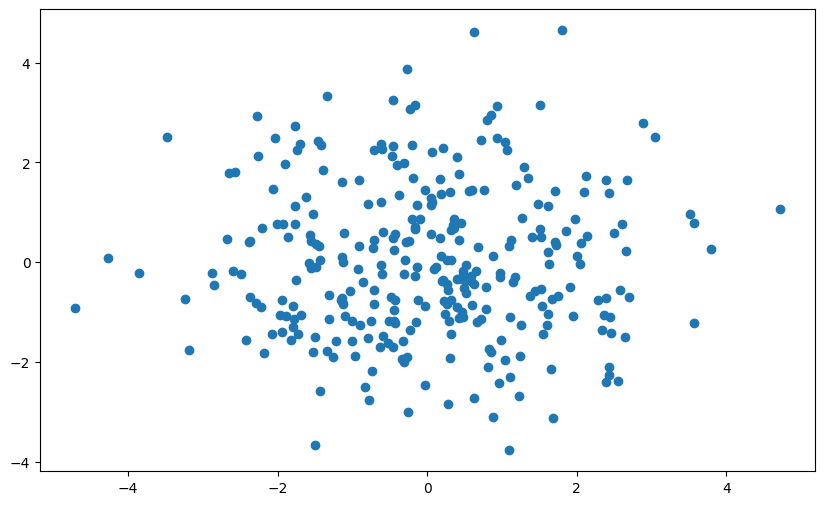

In [44]:
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(StandardScaler().fit_transform(word_embeddings))

plt.figure(figsize=(10, 6))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], marker='o')

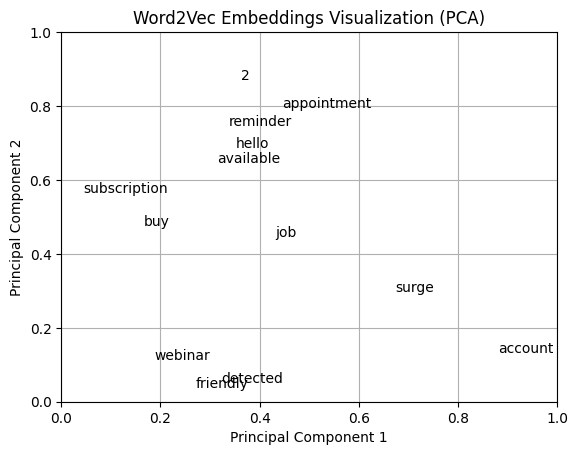

Most similar words to 'meeting': [('thank', 0.25929632782936096), ('will', 0.24854585528373718), ('access', 0.23469451069831848), ('enter', 0.23448140919208527), ('your', 0.22572541236877441), ('ve', 0.2227151244878769), ('money', 0.21266399323940277), ('looking', 0.1991436928510666), ('luck', 0.19419558346271515), ('2', 0.18915194272994995)]


In [45]:
for i, word in enumerate(vocab):
    plt.annotate(word, xy=(reduced_embeddings[i, 0], reduced_embeddings[i, 1]))

plt.title("Word2Vec Embeddings Visualization (PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

print("Most similar words to 'meeting':", word_vectors.most_similar('meeting'))

In [46]:
import numpy as np
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# nltk.download('punkt')

df = pd.read_csv("email_dataset.csv", quotechar='"')

df['tokenized_message'] = df['message'].apply(lambda x: word_tokenize(str(x).lower()))

word2vec_model = Word2Vec(df['tokenized_message'], vector_size=100, window=5, min_count=1, workers=4)

def get_sentence_vector(sentence, model):
    words = word_tokenize(sentence.lower())
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    return np.mean(word_vectors, axis=0) if word_vectors else np.zeros(100)

X = np.array([get_sentence_vector(sentence, word2vec_model) for sentence in df['message']])
y = np.where(df['category'] == 'spam', 1, 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = LogisticRegression()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(f"Model Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

test_message = "You have won a free trip to Paris! Claim your prize now."
vector = get_sentence_vector(test_message, word2vec_model).reshape(1, -1)
prediction = clf.predict(vector)[0]
print(f"Test Message: {test_message}")
print(f"Prediction: {'Spam' if prediction == 1 else 'Ham'}")


Model Accuracy: 33.33%

Classification Report:
               precision    recall  f1-score   support

           0       0.33      1.00      0.50         5
           1       0.00      0.00      0.00        10

    accuracy                           0.33        15
   macro avg       0.17      0.50      0.25        15
weighted avg       0.11      0.33      0.17        15

Test Message: You have won a free trip to Paris! Claim your prize now.
Prediction: Ham


d:\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [47]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

nltk.download('punkt')
nltk.download('stopwords')

df = pd.read_csv("email_dataset.csv", quotechar='"')

stop_words = set(stopwords.words("english"))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)  
    text = re.sub(r'\W', ' ', text)  
    text = re.sub(r'\s+', ' ', text).strip()
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]  
    return " ".join(words)

df['cleaned_message'] = df['message'].apply(clean_text)

vectorizer = TfidfVectorizer(max_features=5000)  
X = vectorizer.fit_transform(df['cleaned_message']).toarray()

y = np.where(df['category'] == 'spam', 1, 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=200, random_state=42)  
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(f"Model Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

test_message = "You have won a free trip to Paris! Claim your prize now."
vector = vectorizer.transform([clean_text(test_message)]).toarray()
prediction = clf.predict(vector)[0]
print(f"Test Message: {test_message}")
print(f"Prediction: {'Spam' if prediction == 1 else 'Ham'}")

test_message = "Reminder: Your appointment is scheduled for tomorrow at 10 AM."
vector = vectorizer.transform([clean_text(test_message)]).toarray()
prediction = clf.predict(vector)[0]
print(f"Test Message: {test_message}")
print(f"Prediction: {'Spam' if prediction == 1 else 'Ham'}")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anand\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anand\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Model Accuracy: 73.33%

Classification Report:
               precision    recall  f1-score   support

           0       0.56      1.00      0.71         5
           1       1.00      0.60      0.75        10

    accuracy                           0.73        15
   macro avg       0.78      0.80      0.73        15
weighted avg       0.85      0.73      0.74        15

Test Message: You have won a free trip to Paris! Claim your prize now.
Prediction: Spam
Test Message: Reminder: Your appointment is scheduled for tomorrow at 10 AM.
Prediction: Ham


In [ ]:
test_messages = [
    "You have won a free trip to Paris! Claim your prize now.",  
    "Reminder: Your appointment is scheduled for tomorrow at 10 AM."
]

for msg in test_messages:
    vector = vectorizer.transform([clean_text(msg)]).toarray()
    prediction = clf.predict(vector)[0]
    print(f"Test Message: {msg}")
    print(f"Prediction: {'Spam' if prediction == 1 else 'Ham'}\n")


Test Message: You have won a free trip to Paris! Claim your prize now.
Prediction: Spam

Test Message: Reminder: Your appointment is scheduled for tomorrow at 10 AM.
Prediction: Ham

